In [0]:
# Keras 라이브러리 불러오기

# 숫자를 One-Hot Vector로 만들어주는 라이브러리
from keras.utils import np_utils

# MNIST Dataset을 가져오기 위한 라이브러리
from keras.datasets import mnist

# 딥 러닝 모델을 순차적으로 만들기 위한 라이브러리
from keras.models import Sequential

# Dense : MLP층, Activation : 활성화 함수
from keras.layers import Dense, Activation

import numpy as np # 행렬 계산을 위한 넘파이 라이브러리
import cv2 # 이미지 처리를 위한 OpenCV 라이브러리
from google.colab.patches import cv2_imshow # Google Colab에서 이미지를 보기 위한 함수

Using TensorFlow backend.


In [0]:
# Dataset 구성

# MNIST Dataset이 저장되어 있는 어딘가에서 MNIST Dataset을 가져옵니다
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Training Set의 모양을 한번 봅시다
print('x_train :', np.shape(x_train))
print('y_train :', np.shape(y_train))

# 한 번 Dataset에 무엇이 들어있는지 Test Set의 10개만 봅시다
for i in range(10):
  cv2_imshow(x_test[i])

11493376/11490434 [==============================] - 0s 0us/step
x_train : (60000, 28, 28)
y_train : (60000,)


In [0]:
# Dataset 전처리

# 픽셀 값을 0~255 범위에서 0~1 범위로 낮춰줍니다 / 오차 값을 적절한 범위에 맞추기 위함
# astype('float32') : int(정수)를 float(실수)로 바꾸어줍니다.
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 0 ~ 9 사이의 숫자를 One-Hot Vector로 바꿔줍니다
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('y_train :', np.shape(y_train))
print('y_train[0] :', y_train[0])

# Validation Set이 없으므로 60000개의 Train Set 중 10000개를 떼서 만듭니다
x_valid = x_train[50000:]
y_valid = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

print('x_train :', np.shape(x_train))
print('x_valid :', np.shape(x_valid))

y_train : (60000, 10)
y_train[0] : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
x_train : (50000, 784)
x_valid : (10000, 784)


In [0]:
# 모델 구성하기

# Sequential() 함수를 통해 빈 모델을 만듭니다
model = Sequential(name = 'MNIST_MLP')

# add() 함수를 통해 층을 더해 나갑니다
# Dense() 는 MLP의 한 층을 의미합니다

model.add(Dense(units=256, input_dim=784, activation='relu', name = 'Dense_1'))
# input_dim : 첫 번째 층 외엔 생략 가능하며, 입력으로 들어올 데이터의 모양을 의미합니다
# units : 층의 노드 수를 의미하며, 출력의 수와 같습니다.

model.add(Dense(units=64, activation='relu', name = 'Dense_2'))
model.add(Dense(units=10, activation='softmax', name = 'Dense_3'))

# 모델이 어떻게 구성되어 있는지 볼 수 있습니다.
model.summary()

# Tensorflow Version 차이로 인해 몇 가지 무시 가능한 경고 문구가 뜰 수 있습니다
# Param # 은 해당 층의 파라미터(가중치, 바이어스) 수를 나타냅니다

W0903 15:49:28.785776 140198177101696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0903 15:49:28.841512 140198177101696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Model: "MNIST_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
Dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
Dense_3 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 모델 학습 과정을 설정합니다

# loss는 목적 함수를 의미하며, categorical_crossentropy는 분류가 2개 이상인 CEE를 의미합니다
# optimizer는 학습 방법을 의미하며, SGD를 사용합니다
# metrics는 학습 도중 화면에 어떤 값을 띄울까를 결정합니다
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 그 후 모델을 학습시킵니다

# fit() 함수를 통해 실제로 학습 가능합니다.
# fit() 함수는 학습 결과를 기록하여 반환하기 때문에 hist에 그 기록이 저장됩니다
hist = model.fit(x = x_train, y = y_train, # Training Dataset
                 epochs = 10, # Epochs : Training과 Validation 반복 수 
                 verbose = 1, # 화면에 정보를 얼마나 출력할지 결정합니다
                 validation_data = (x_valid, y_valid), # Validation Dataset
                 batch_size=32 # Mini-batch 크기 설정
                )

W0903 15:49:33.451788 140198177101696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0903 15:49:33.486984 140198177101696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.

W0903 15:49:33.624682 140198177101696 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0903 15:49:33.688974 140198177101696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecate

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 234us/step - loss: 0.6404 - acc: 0.8351 - val_loss: 0.3137 - val_acc: 0.9129
Epoch 2/10
50000/50000 [==============================] - 7s 140us/step - loss: 0.3031 - acc: 0.9129 - val_loss: 0.2493 - val_acc: 0.9284
Epoch 3/10
50000/50000 [==============================] - 7s 138us/step - loss: 0.2490 - acc: 0.9284 - val_loss: 0.2133 - val_acc: 0.9415
Epoch 4/10
50000/50000 [==============================] - 7s 142us/step - loss: 0.2139 - acc: 0.9382 - val_loss: 0.1911 - val_acc: 0.9480
Epoch 5/10
50000/50000 [==============================] - 7s 140us/step - loss: 0.1872 - acc: 0.9461 - val_loss: 0.1716 - val_acc: 0.9518
Epoch 6/10
50000/50000 [==============================] - 7s 138us/step - loss: 0.1669 - acc: 0.9517 - val_loss: 0.1564 - val_acc: 0.9568
Epoch 7/10
50000/50000 [==============================] - 7s 137us/step - loss: 0.1500 - acc: 0.9577 - val_loss: 0.1475 -

Training Loss : [0.6403701652812958, 0.30314658852100373, 0.24896895043373107, 0.2138630971837044, 0.18717725287795067, 0.16688006976902484, 0.149953324457407, 0.1361271092736721, 0.12401307658612729, 0.11385390907227994]
Accuracy : [0.83506, 0.91288, 0.9284, 0.93822, 0.94606, 0.95166, 0.95766, 0.96114, 0.96556, 0.96826]


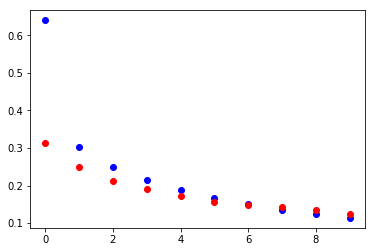

In [0]:
# 학습과정 살펴보기

# hist는 Epoch 마다의 목적함수의 값과 정확도를 기록하고 있습니다
print('Training Loss :', hist.history['loss'])
print('Accuracy :',hist.history['acc'])

# hist에 저장된 값을 그래프로 나타내기 위한 matplotlib 라이브러리
import matplotlib.pyplot as plt

# 1~10 의 자연수를 갖는 리스트를 만듭니다
epoch_list = np.arange(0,10)

# epoch에 따른 Training set에 대한 목적함수 값 변화를 그립니다
plt.plot(epoch_list, hist.history['loss'], 'o', color='blue')

# epoch에 따른 Validation set에 대한 목적함수 값 변화를 그립니다
plt.plot(epoch_list, hist.history['val_loss'], 'o', color='red')

# 그래프 나타내기
plt.show()

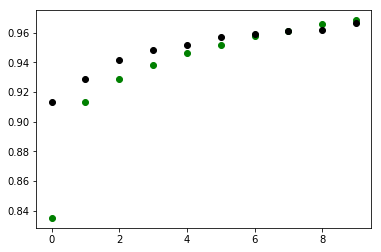

In [0]:
# epoch에 따른 Training set에 대한 정확도 변화를 그립니다
plt.plot(epoch_list, hist.history['acc'], 'o', color='green')

# epoch에 따른 Validation set에 대한 정확도 값 변화를 그립니다
plt.plot(epoch_list, hist.history['val_acc'], 'o', color='black')

plt.show()

In [0]:
# 모델 테스트

# Test Set으로 모델을 테스트해봅니다
# evaluate() 함수를 통해 테스트가 가능합니다
loss_acc = model.evaluate(x_test, y_test, batch_size=32)

print('Test Set Loss :', loss_acc[0])
print('Test Set Accuracy :', loss_acc[1])

10000/10000 [==============================] - 1s 53us/step
Test Set Loss : 0.12115066864788532
Test Set Accuracy : 0.9651


In [0]:
# 모델을 직접 써봅시다

# Test Set 20개를 맞춰봅시다
for i in range(20):
  
  # predict()를 통해 입력을 모델에 통과시킬 수 있습니다
  # output은 softmax의 출력으로 10개의 값을 갖습니다
  output = model.predict(x_test[i].reshape(1,784))
  # predict()의 입력은 맨 앞에 차원을 하나 추가해주어야 합니다
  
  # 이미지를 보기 위해 다시 사각형으로 만들고, 다시 255를 곱해줍니다
  cv2_imshow(x_test[i].reshape(28, 28) * 255)
  
  # argmax() 함수는 가장 최댓값을 갖는 Index(번째)를 찾아줍니다
  print('예상 숫자 분류 :', np.argmax(output))
  
  # 모델의 출력과 실제 값을 비교 후 다르면 문장을 출력합니다
  if np.argmax(output) != np.argmax(y_test[i]) :
    print('틀렸습니다!')

예상 숫자 분류 : 7


예상 숫자 분류 : 2


예상 숫자 분류 : 1


예상 숫자 분류 : 0


예상 숫자 분류 : 4


예상 숫자 분류 : 1


예상 숫자 분류 : 4


예상 숫자 분류 : 9


예상 숫자 분류 : 6
틀렸습니다!


예상 숫자 분류 : 9


예상 숫자 분류 : 0


예상 숫자 분류 : 6


예상 숫자 분류 : 9


예상 숫자 분류 : 0


예상 숫자 분류 : 1


예상 숫자 분류 : 5


예상 숫자 분류 : 9


예상 숫자 분류 : 7


예상 숫자 분류 : 3


예상 숫자 분류 : 4


In [0]:
# 본인의 구글 드라이브 → 지금 실행중인 코드

# google.colab.drive : 구글 드라이브에서 파일을 가져오기 위한 코드를 담고 있다.
from google.colab import drive

# 본인의 구글 드라이브를 '/gdrive' 라는 경로로 하여 쓸 수 있다.
drive.mount('/gdrive', force_remount=True)

In [0]:
# 모델은 h5 파일 형태로 저장됩니다
model.save('/gdrive/My Drive/MNIST_MLP.h5')

# 모델을 불러오기 위해 지워줍니다
del model

# 저장되어 있는 모델을 불러오기 위한 load_model 함수
from keras.models import load_model

# 'model' 에 해당 모델을 불러옵니다
model = load_model('/gdrive/My Drive/MNIST_MLP.h5')

Using TensorFlow backend.
